# Imágenes y Matrices

In [1]:
import cv2
import numpy as np
%matplotlib inline
import cuia

OpenCV utiliza la biblioteca [NumPy](https://numpy.org) para el almacenamiento y manipulación de imágenes en forma de matrices multidimensionales [ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html)

In [2]:
baboon = cv2.imread("media/baboon.jpg")

Las imágenes son almacenadas en matrices tridimensionales de enteros de 8 bits sin signo [uint8](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint8). En estas matrices la primera dimensión representa las filas de la imagen, la segunda dimensión las columnas y la tercera las bandas. 

**ATENCIÓN**: Acostumbramos a referirnos a la posición de un pixel en pantalla indicando primero la columna (x) y después la fila (y), es decir, usamos unas coordenadas (x,y). Sin embargo, en OpenCV al acceder a la matriz de una imagen debemos indicar primero la fila (y) y después la columna (x).

Una matriz ofrece una propiedad [shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html) que devuelve una tupla con el tamaño de cada una de las dimensiones de la imagen.

In [3]:
print(baboon.shape)

(512, 512, 3)


Podemos comprobar que la imagen baboon tiene 512 filas, 512 columnas y 3 bandas. La cantidad de bandas de una imagen dependen del [espacio de color](https://es.wikipedia.org/wiki/Espacio_de_color) con el que está codificada la imagen. Algunos ejemplos de espacios de color empleados en OpenCV son:
* Código: GRAY
    * Número de bandas: 1
    * Espacio de color: Escala de grises
    * Banda 0 [0 - 255] Representa la luminosidad del pixel en unna imagen en escala de grises
* Código: BGR
    * Número de bandas: 3
    * Espacio de color [RGB](https://es.wikipedia.org/wiki/RGB) almacenado en el orden B-G-R
    * Banda 0 (B) [0 - 255] Representa la intensidad del color azul
    * Banda 1 (G) [0 - 255] Representa la intensidad del color verde
    * Banda 2 (R) [0 - 255] Representa la intensidad del color rojo
* Código: RGB
    * Número de bandas: 3
    * Espacio de color [RGB](https://es.wikipedia.org/wiki/RGB) almacenado en el orden R-G-B
    * Banda 0 (R) [0 - 255] Representa la intensidad del color rojo
    * Banda 1 (G) [0 - 255] Representa la intensidad del color verde
    * Banda 2 (B) [0 - 255] Representa la intensidad del color azul
* Código: HSV
    * Número de bandas: 3
    * Espacio de color [HSV](https://es.wikipedia.org/wiki/Modelo_de_color_HSV)
    * Banda 0 (H) [0 - 180] Representa el tono (H)
    * Banda 1 (S) [0 - 255] Representa la saturación (S)
    * Banda 2 (V) [0 - 255] Representa el valor (V)
* Código: BGRA
    * Número de bandas: 4
    * Espacio de color [RGB](https://es.wikipedia.org/wiki/RGB) con banda alfa representanndo la opacidad de los píxeles almacenado en el orden B-G-R-A
    * Banda 0 (B) [0 - 255] Representa la intensidad del color azul
    * Banda 1 (G) [0 - 255] Representa la intensidad del color verde
    * Banda 2 (R) [0 - 255] Representa la intensidad del color rojo
    * Banda 3 (A) [0 - 255] Representa la opacidad del pixel (0=Transparencia total, 255=Opacidad total)

OpenCV por defecto usa el espacio de color RGB pero con el orden **BGR** (Esto es debido a que cuando se creó OpenCV no estaba ampliamente aceptado el orden RGB sino que más bien era BGR el ordenamiento más popular). OpenCV ofrece la posibilidad de convertir el espacio de color de una imagen entre RGB, BGR y otros muchos espacios de color adicionales mediante la función [cvtColor](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) La llamada a cvtColor necesita un argumento que indica el tipo de conversión, especificando el espacio de color de la imagen original y el espacio de color destino. Por ejemplo, para convertir al espacio de color HSV la imagen baboon que está en BGR, el código de conversión es cv2.COLOR_BGR2HSV (OpenCV soporta muchos [códigos de conversión](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0) distintos)

In [4]:
baboon_hsv = cv2.cvtColor(baboon, cv2.COLOR_BGR2HSV)

La función [imread(filename[,flags])](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gab32ee19e22660912565f8140d0f675a8) lee de disco una imagen, la interpreta en función de su contenido sin importar la extensión del fichero y la almacena en una matriz de NumPy.
Si no se indica ninguna [flag](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80), por defecto las imágenes en color las convierte al espacio de color BGR. En el caso de las imágenes con canal alfa, si queremos que se coonserve la información del canal alfa debemos leer la imagen con el parámetro cv2.IMREAD_UNCHANGED.

Comprobemos el efecto que tiene leer una imagen con canal alfa con la conversión a BGR por defecto y la mostraremos mediante Matplotlib usando la función **plot** definida en cuia.py.

(120, 117, 3)


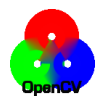

In [5]:
opencv = cv2.imread("media/opencv.png")
print(opencv.shape)
cuia.plot(opencv)

Ahora comprobaremos el efecto de hacer la lectura usando cv2.IMREAD_UNCHANGED

(120, 117, 4)


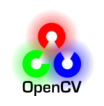

In [6]:
opencv = cv2.imread("media/opencv.png", cv2.IMREAD_UNCHANGED)
print(opencv.shape)
cuia.plot(opencv)

La función [**imshow(	winname, mat	)**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563), si recibe una matriz de una sola banda la interpreta como una imagen en escala de grises, si recibe 3 bandas la interpreta como una imagen BGR y si recibe 4 bandas la interpreta como una imagen BGRA pero ignorando el canal alfa. Por ese motivo, una imagen con canal alfa no es mostrada por imshow como esperábamos. Usaremos imshow dentro de la función **popup** que definimos en cuia.py.

In [ ]:
cuia.popup("OPENCV",opencv)

OpenCV ofrece funciones para unir y separar las bandas de una imagen. La función [split](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a) permite separar una imagen multibanda en varias imágenes monobanda.

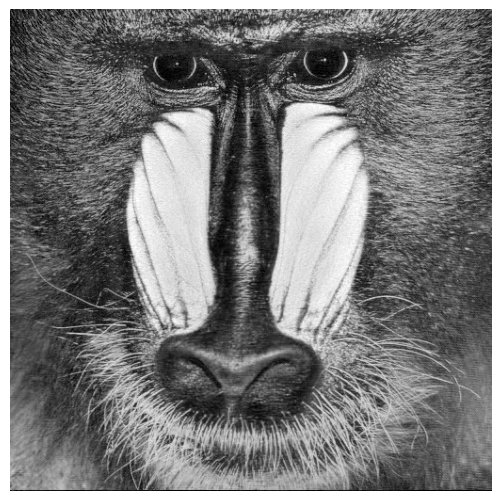

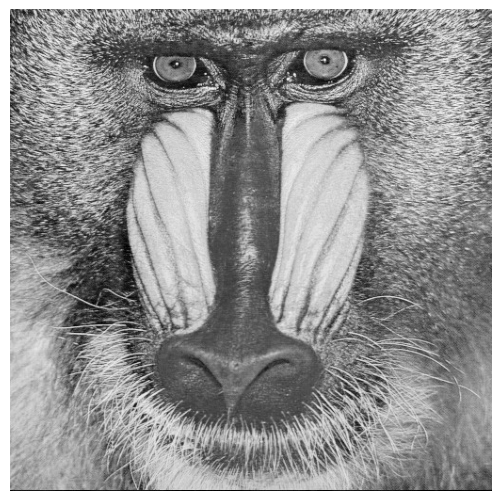

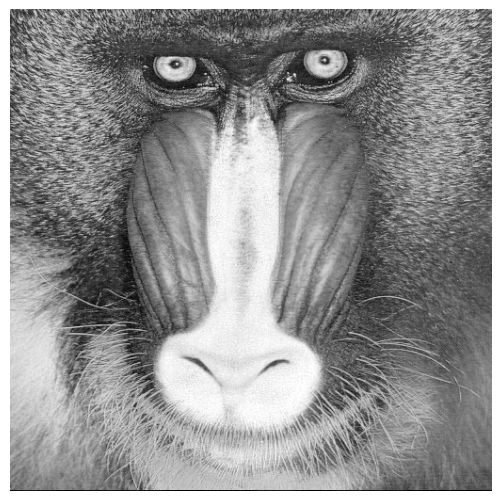

In [18]:
b, g, r = cv2.split(baboon)
cuia.plot(b)
cuia.plot(g)
cuia.plot(r)

Aunque cada banda representa la intensidad de una las bandas azul, verde y roja respectivamente, OpenCV las imágenes de una sola banda las interpresta como imágenes en escala de grises. La operación opuesta, que compone una imagen multibanda a partir de barias imágenes monobanda, es [merge](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d). Con ella podemos reconstruir la imagen original a partir de las imágenes monobanda prestando atención al orden en que se indican dichas bandas.

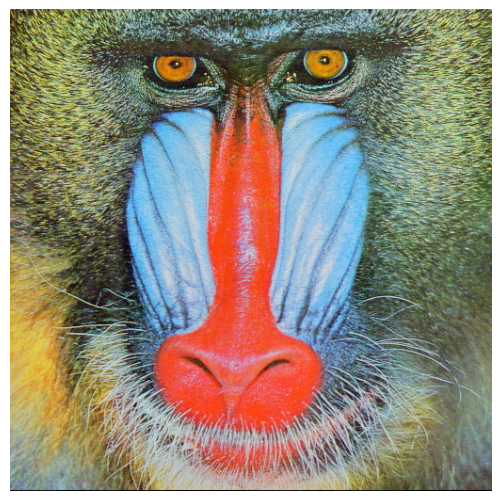

In [19]:
baboonbgr = cv2.merge((b,g,r))
cuia.plot(baboonbgr)

Si utilizamos otro orden en las bandas obtendremos una imagen en [falso color](https://es.wikipedia.org/wiki/Falso_color)

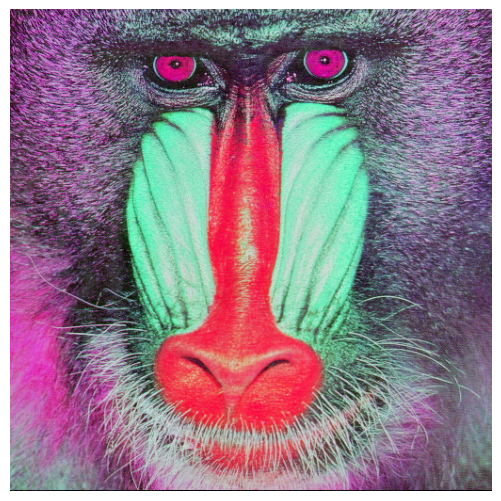

In [20]:
baboongbr = cv2.merge((g,b,r))
cuia.plot(baboongbr)

La separación de canales y manipulación individualizada de los mismos será un recurso que usaremos en el futuro. A esto añadiremos las posibilidades que ofrece NumPy para la [creación de matrices](https://numpy.org/doc/stable/reference/routines.array-creation.html) con valores constantes, aleatorios uniformes, ...

Por ejemplo, si queremos mostrar la banda roja de *baboon* en un gradiente de rojos en lugar de en escala de grises necesitamos un aerray de 3 bandas (para que sea interpretado como imagen de color) en el que las bandas azul y verde están a cero.

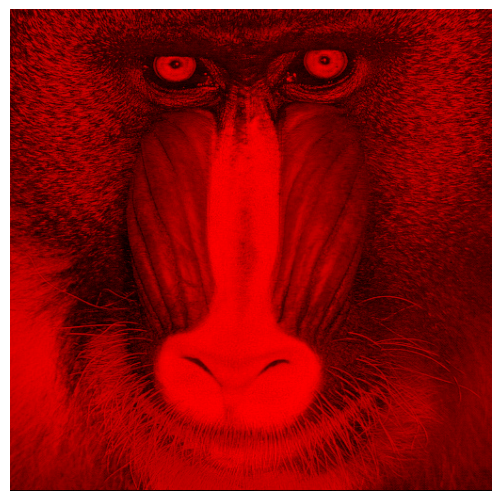

In [23]:
cero = np.zeros_like(r) #Esta función crea una matriz inicializada a cero con las mismas dimensiones y tipo que la que se pasa como argumento
gradiente = cv2.merge((cero, cero, r))
cuia.plot(gradiente)

Numpy, al igual que Python, ofrece la posibilidad de acceder y manipular parted de una matriz mediante [slicing](https://numpy.org/doc/1.21/reference/arrays.indexing.html). Esto no sofrece la posibilidad de realizar mediante una sola orden operaciones que en otros lenguajes requieren varios bucles anidados.

Por ejemplo, si queremos tomar la imagen *baboon* y poner a cero la componente roja (banda 2 del modelo BGR) de todos los píxeles que se encuentren entre las filas 60 y 200 y entre las columnas 250 y 450...

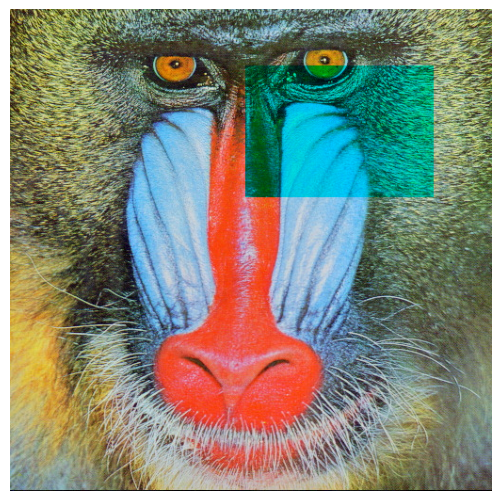

In [8]:
copia = baboon.copy() #Un array de NumPy ofrece el método copy para hacer una copia (y así no modificamos el original)
copia[60:200, 250:450, 2] = 0
cuia.plot(copia)

También podemos hacer una asignación de una matriz (o submatriz) en otra submatriz. Por ejemplo, podemos colocar el icono de OpenCV en el centro de *baboon*.

**Importante:** Las dimensiones de la submatriz de la parte izquierda de la asignación deben coincidir con las dimensiones de la submatriz resultante de la parte derecha de la asignación 

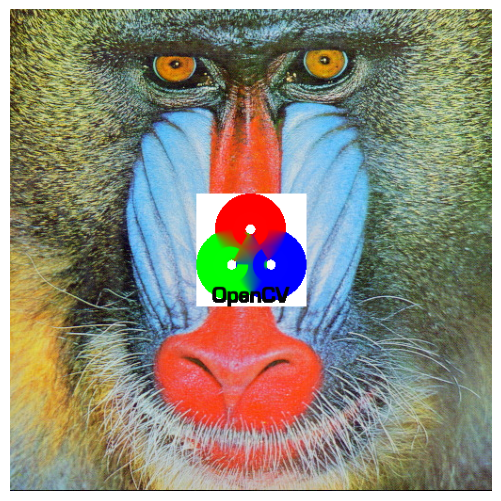

In [9]:
imagen=baboon.copy()
#Obtenemos las dimensiones del icono
h = opencv.shape[0]
w = opencv.shape[1]
#Calculamos la posición de la esquina superior izquierda del icono para que aparezca centrado (la operación // de Python realiza una división entera)
desdey = imagen.shape[0] // 2 - h // 2
desdex = imagen.shape[1] // 2 - w // 2
#Podemos ver como el slicing se puede usar en la parte izquierda y en la parte derecha de una asignación
imagen[desdey:desdey+h, desdex:desdex+w,0:3] = opencv[:,:,0:3]
cuia.plot(imagen)

La operación ha funcionado pero no era lo que esperábamos porque no se ha coonsiderado el canal alfa de la imagen de OpenCV.

Una primera aproximación al problema sería la de calcular una media ponderada entre los píxeles de la imagen de fondo y los píxeles de la imagen de primer plano. Aunque existe una función [addWeighted](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19), ésta utiliza el mismo peso para todos los píxeles de cada imagen. Lo que necesitamos en este caso es aplicar un peso distinto a cada pixel según lo que se indique en el canal alfa de la imagen. Al calcular la intensidad media de las componentes BGR de las imágenes necesitamos que los pesos sumen 1 para que el resultado no se salga del rango.

Supongamos una imagen de fondo, de la que descartamos el canal alfa y una imagen de primer plano que queremos superponer sobre el fondo considerando su canal alfa. Asignaremos a cada pixel de la imagen de primer plano un peso $\alpha$ proporcional a la opacidad indicada por su canal alfa, normalizando dicho peso al intervalo [0,1] mediante una división entre el valor máximo de opacidad que es 255. Al pixel corrfespondiente de la imagen de fondo le asignaremos un peso (1-$\alpha$) con lo que logramos que los pesos sumen 1.

Como las operaciones entre matrices deben aplicarse en operandos de iguales dimensiones recurriremos a la función [stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) de NumPy para tomar la información del canal alfa (1 banda) y convertirlo en un array de 3 bandas para poder operar con matrices de color de 3 bandas BGR

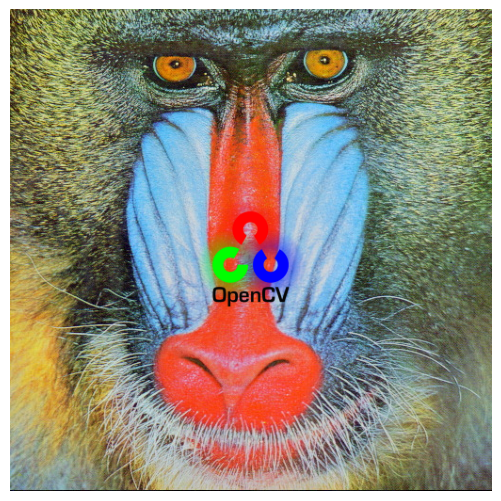

In [14]:
imagen=baboon.copy()
#Obtenemos las dimensiones del icono
h = opencv.shape[0]
w = opencv.shape[1]
#Calculamos la posición de la esquina superior izquierda del icono para que aparezca centrado (la operación // de Python realiza una división entera)
desdey = imagen.shape[0] // 2 - h // 2
desdex = imagen.shape[1] // 2 - w // 2
#Calculamos el peso de la imagen de primer plano
alfa = opencv[:,:,3] / 255.0 #Este resultado es una matriz de 1 banda
#Para poder hacer operaciones matriciales necesitamos que los operandos tengas las mismas dimensiones. Por ello convertiremos alfa en una matriz de 3 bandas para poder operar con ella en matrices BGR
alfa = np.stack((alfa, alfa, alfa), axis=2) #axis=2 idica el eje por el que se hará el apilado (0=filas 1=columnas 2=bandas)
#Realizamos la media ponderada de las dos imágenes
imagen[desdey:desdey+h, desdex:desdex+w,0:3] = (1-alfa)*imagen[desdey:desdey+h, desdex:desdex+w,0:3] + alfa*opencv[:,:,0:3]
cuia.plot(imagen)

El resultado obtenido carece de canal alfa y nno se ha considerado la posibilidad de que la misma imagen de fondo tenga canal alfa. La [Composición Alfa](https://en.wikipedia.org/wiki/Alpha_compositing) es la operación de combinar dos imágenes considerando sus canales de opacidad y generando a su vez una imagen que posee canal alfa.

Sea una imagen A formada por las bandas [BGRA]. Llamaremos $C_{A}$ a la componente visual BGR y llamaremos $\alpha_A$ al canal alfa. Igualmente $C_B$ y $\alpha_B$ serán los correspondientes a la imagen B. La composición alfa de A sobre B dará como resultado una imagen O formada por una componente visual BGGR $C_O$ y un canal alfa $\alpha_O$ definidos según:

![Composición alfa](https://wikimedia.org/api/rest_v1/media/math/render/svg/5c24c56475a4c3d86f6903f16195b866185f0551 "Composición alfa")

Definiremos una función que realizará la composición alfa considerando distintos tipos de imágenes (gris, BGR y BGRA) y que será incluida en cuia.py para poder recurrir a ella en el futuro.

In [15]:
def alphaBlending(fg, bg, x=0, y=0):
    sfg = fg.shape
    fgh = sfg[0]
    fgw = sfg[1]

    sbg = bg.shape
    bgh = sbg[0]
    bgw = sbg[1]

    h = max(bgh, y + fgh) - min(0, y)
    w = max(bgw, x + fgw) - min(0, x)

    CA = np.zeros(shape=(h, w, 3))
    aA = np.zeros(shape=(h, w))
    CB = np.zeros(shape=(h, w, 3))
    aB = np.zeros(shape=(h, w))

    bgx = max(0, -x)
    bgy = max(0, -y)

    if len(sbg) == 2 or sbg[2]==1:
        aB[bgy:bgy+bgh, bgx:bgx+bgw] = np.ones(shape=sbg)
        CB[bgy:bgy+bgh, bgx:bgx+bgw, :] = cv2.cvtColor(bg, cv2.COLOR_GRAY2BGR)
    elif sbg[2] == 3:
        aB[bgy:bgy+bgh, bgx:bgx+bgw] = np.ones(shape=sbg[0:2])
        CB[bgy:bgy+bgh, bgx:bgx+bgw, :] = bg
    else:
        aB[bgy:bgy+bgh, bgx:bgx+bgw] = bg[:, :, 3] / 255.0
        CB[bgy:bgy+bgh, bgx:bgx+bgw, :] = bg[:, :, 0:3]

    fgx = max(0, x)
    fgy = max(0, y)

    if len(sfg) == 2 or sfg[2]==1:
        aA[fgy:fgy+fgh, fgx:fgx+fgw] = np.ones(shape=sfg)
        CA[fgy:fgy+fgh, fgx:fgx+fgw, :] = cv2.cvtColor(fg, cv2.COLOR_GRAY2BGR)
    elif sfg[2] == 3:
        aA[fgy:fgy+fgh, fgx:fgx+fgw] = np.ones(shape=sfg[0:2])
        CA[fgy:fgy+fgh, fgx:fgx+fgw, :] = fg
    else:
        aA[fgy:fgy+fgh, fgx:fgx+fgw] = fg[:, :, 3] / 255.0
        CA[fgy:fgy+fgh, fgx:fgx+fgw, :] = fg[:, :, 0:3]

    aA = cv2.merge((aA, aA, aA))
    aB = cv2.merge((aB, aB, aB))
    a0 = aA + aB * (1 - aA)
    C0 = np.divide(((CA * aA) + (CB * aB)*(1.0 - aA)), a0, out=np.zeros_like(CA), where=(a0!=0))

    res = cv2.cvtColor(np.uint8(C0), cv2.COLOR_BGR2BGRA)
    res[:, :, 3] = np.uint8(a0[:, :, 0] * 255.0)

    return res

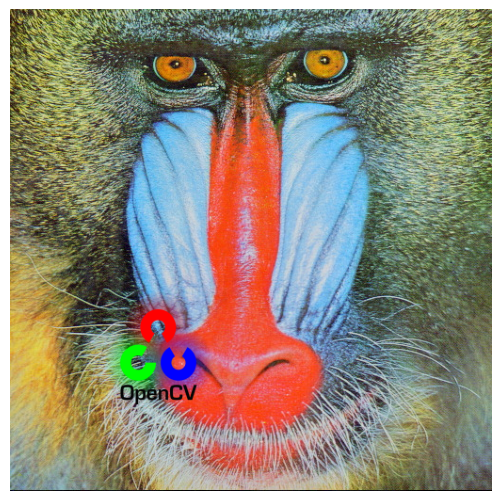

In [17]:
cuia.plot(cuia.alphaBlending(opencv, baboon, 100, 300))